In [1]:
import pandas as pd
import altair as alt

alt.data_transformers.enable('data_server')
alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

In [2]:
alcoholism_pre = pd.read_csv('../../data/alcoholism_pre_features_tfidf_256.csv')
alcoholism_post = pd.read_csv('../../data/alcoholism_post_features_tfidf_256.csv')

In [3]:
alcoholism_pre.head()

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,alcoholism,RobynTacoo,2019/10/19,My husband offered me a glass of wine I turned...,-0.198667,2.104538,2.350000,90.088333,96.000000,4.666667,...,0.000000,0.479482,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,alcoholism,wolsinyourarea,2019/10/19,Feeling like a failure Broke my 2 week streak ...,1.037778,3.342263,1.905185,97.433333,84.185185,5.081481,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alcoholism,glitterONeverything,2019/10/19,help! withdrawals are crazy!! I feel lije shit...,-0.188804,1.902164,1.454909,99.993668,87.840580,3.450000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,alcoholism,Collector420,2019/10/19,God damn I (M17) wrote messages to almost 20 p...,5.092809,4.536881,6.599191,79.453393,68.438202,8.917753,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,alcoholism,engineerkoala,2019/10/19,How to have as much fun as before Today was my...,2.243046,4.724179,2.947451,90.752418,80.529412,4.248366,...,0.337441,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
columns_of_interest = ['subreddit', 'author', 'date', 'post', 'substance_use_total']

alcoholism_pre = alcoholism_pre.loc[:, columns_of_interest]
alcoholism_post = alcoholism_post.loc[:, columns_of_interest]

In [5]:
alcoholism_pre.head(5)

,subreddit,author,date,post,substance_use_total
0,alcoholism,RobynTacoo,2019/10/19,My husband offered me a glass of wine I turned...,2
1,alcoholism,wolsinyourarea,2019/10/19,Feeling like a failure Broke my 2 week streak ...,0
2,alcoholism,glitterONeverything,2019/10/19,help! withdrawals are crazy!! I feel lije shit...,1
3,alcoholism,Collector420,2019/10/19,God damn I (M17) wrote messages to almost 20 p...,2
4,alcoholism,engineerkoala,2019/10/19,How to have as much fun as before Today was my...,1


In [6]:
alcoholism_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            1428 non-null   object
 1   author               1428 non-null   object
 2   date                 1428 non-null   object
 3   post                 1428 non-null   object
 4   substance_use_total  1428 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 55.9+ KB


In [7]:
alcoholism_post.head(5)

,subreddit,author,date,post,substance_use_total
0,alcoholism,glorybellpirate,2020/01/01,Day 1 of sobriety Feeling anxious and letting ...,1
1,alcoholism,EhndlessSl0th,2020/01/01,"Started the New Year with a bang. Hey, I'm new...",1
2,alcoholism,the_kinky_penguin,2020/01/01,Why can't I get drunk anymore I've been a heav...,3
3,alcoholism,SauceoffSauceOn,2020/01/01,I am an Alcoholic. How do I quit? I have been ...,2
4,alcoholism,ben42187,2020/01/01,Funniest Thing about Alcoholism With every oth...,3


In [8]:
alcoholism_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   subreddit            1428 non-null   object
 1   author               1428 non-null   object
 2   date                 1428 non-null   object
 3   post                 1428 non-null   object
 4   substance_use_total  1428 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 55.9+ KB


In [9]:
alcoholism_pre.describe()

,substance_use_total
count,3087.000000
mean,4.406868
std,4.376296
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,53.000000


In [10]:
alcoholism_post.describe()

,substance_use_total
count,1428.000000
mean,4.209384
std,4.128659
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,28.000000


In [11]:
alcoholism_pre['period'] = 'pre'
alcoholism_post['period'] = 'post'

alcoholism_df = pd.concat([alcoholism_pre, alcoholism_post])
alcoholism_df

,subreddit,author,date,post,substance_use_total,period
0,alcoholism,RobynTacoo,2019/10/19,My husband offered me a glass of wine I turned...,2,pre
1,alcoholism,wolsinyourarea,2019/10/19,Feeling like a failure Broke my 2 week streak ...,0,pre
2,alcoholism,glitterONeverything,2019/10/19,help! withdrawals are crazy!! I feel lije shit...,1,pre
3,alcoholism,Collector420,2019/10/19,God damn I (M17) wrote messages to almost 20 p...,2,pre
4,alcoholism,engineerkoala,2019/10/19,How to have as much fun as before Today was my...,1,pre
...,...,...,...,...,...,...
1423,alcoholism,teelamarie,2020/04/20,Support? I am an alcoholic 40/F. I sneak drink...,3,post
1424,alcoholism,nickkkkk77,2020/04/20,My (alcoholic) experience beating coronavirus ...,7,post
1425,alcoholism,chateaudechelsea,2020/04/20,Questions about alcohol detox I’m an addict wi...,9,post
1426,alcoholism,DrLeePhDMd,2020/04/20,You'd think the miserable heartburn would get ...,9,post


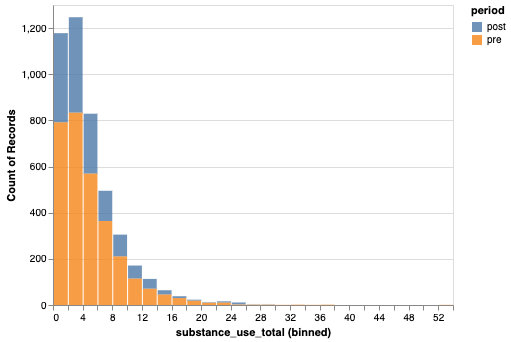

In [12]:
alt.Chart(alcoholism_df).mark_bar(opacity=0.8).encode(
    x=alt.X('substance_use_total', bin=alt.Bin(maxbins=30)),
    y='count()',
    color='period'
)

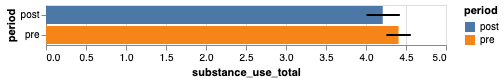

In [13]:
plot = alt.Chart(alcoholism_df).mark_bar().encode(
    x='mean(substance_use_total)',
    y='period',
    color='period'
)

err_bars = alt.Chart(alcoholism_df).mark_errorbar(extent='ci', rule=alt.LineConfig(size=2)).encode(
    x='substance_use_total',
    y='period')

plot + err_bars

In [14]:
print(f"Number of unique authors (posters) in 'pre' dataset: {len(alcoholism_pre.author.unique())}")
print(f"Number of unique authors (posters) in 'post' dataset: {len(alcoholism_post.author.unique())}")

Number of unique authors (posters) in 'pre' dataset: 3087
Number of unique authors (posters) in 'post' dataset: 1428


The dataset is imbalanced with more people posting before the pandemic.
We see that the mean of `substance_use_total` was greater before the pandemic rather than after.